# Post processing the Offshore ABL case

In [1]:
%%capture 

# Important libraries header information
# ----------------------------------

# change this directory as necessary
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/ascldap/users/lcheung/wind_uq/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil
for x in amrwindfedirs: sys.path.insert(1, x)

# Load the libraries
import matplotlib.pyplot as plt
import amrwind_frontend  as amrwind
import numpy             as np
from matplotlib import cm
import re
import time

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
def plotrotorlines(zhh, rotorD, xstart, xend, **kwargs):
    plt.hlines(zhh,             xstart, xend, linewidth=1.0, **kwargs) # Plot the HH line
    plt.hlines(zhh+rotorD*0.5,  xstart, xend, linewidth=0.5, **kwargs) # Plot the HH line
    plt.hlines(zhh-rotorD*0.5,  xstart, xend, linewidth=0.5, **kwargs) # Plot the HH line    

## Postprocess and compare AMR-Wind velocity profiles

In [3]:
 # Set your run directory here
#casedir = '/nscratch/lcheung/2021/SWIFT_Neutral_WS8.7_Alpha0.14/AMRWind_Precursor/precursor1'
rundir='/lustre/orion/cfd162/scratch/lcheung/ALCC_Frontier_WindFarm/MedWS_LowTI'
caselist = [ 
            #{'rundir':'/lustre/orion/cfd162/scratch/lcheung/testrun_alcc', 'tag':'testrun1',
            # 'inputfile':'MedWS_LowTI_precursor1.inp',
            # 'ncfile':'post_processing/abl_statistics00000.nc', 'avgtimes':[25000, 30000],
            # 'mstyle':{'mfc':'b', 'marker':'s', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'b'}},
            {'rundir':rundir+'/precursor1', 'tag':'precursor1',
             'inputfile':'MedWS_LowTI_precursor1.inp',
             'ncfile':'post_processing/abl_statistics48000.nc', 'avgtimes':[25000, 30000],
             'mstyle':{'mfc':'b', 'marker':'s', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'b'}},    
            {'rundir':rundir+'/precursor2', 'tag':'precursor2',
             'inputfile':'MedWS_LowTI_precursor1.inp',
             'ncfile':'post_processing/abl_statistics40000.nc', 'avgtimes':[25000, 30000],
             'mstyle':{'mfc':'c', 'marker':'s', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'c'}},    
            {'rundir':rundir+'/precursor3', 'tag':'precursor3',
             'inputfile':'MedWS_LowTI_precursor1.inp',
             'ncfile':'post_processing/abl_statistics48000.nc', 'avgtimes':[25000, 30000],
             'mstyle':{'mfc':'g', 'marker':'s', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'g'}},    
            {'rundir':rundir+'/precursor4', 'tag':'precursor4',
             'inputfile':'MedWS_LowTI_precursor1.inp',
             'ncfile':'post_processing/abl_statistics00000.nc', 'avgtimes':[25000, 30000],
             'mstyle':{'mfc':'y', 'marker':'s', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'y'}},    
            {'rundir':rundir+'/precursor5', 'tag':'precursor5',
             'inputfile':'MedWS_LowTI_precursor1.inp',
             'ncfile':'post_processing/abl_statistics48000.nc', 'avgtimes':[25000, 30000],
             'mstyle':{'mfc':'purple', 'marker':'s', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'purple'}},
            {'rundir':rundir+'/precursor6', 'tag':'precursor6',
             'inputfile':'MedWS_LowTI_precursor1.inp',
             'ncfile':'post_processing/abl_statistics48000.nc', 'avgtimes':[25000, 30000],
             'mstyle':{'mfc':'y', 'marker':'o', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'y', 'ls':'--'}},      
            {'rundir':rundir+'/precursor6_4kmX4km_5m', 'tag':'precursor6 4x4',
             'inputfile':'MedWS_LowTI_precursor1.inp',
             'ncfile':'post_processing/abl_statistics00000.nc', 'avgtimes':[25000, 30000],
             'mstyle':{'mfc':'y', 'marker':'v', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'y', 'ls':':'}},      
            {'rundir':rundir+'/precursor6_4kmX2km_5m', 'tag':'precursor6 4x2',
             'inputfile':'MedWS_LowTI_precursor1.inp',
             'ncfile':'post_processing/abl_statistics45000.nc', 'avgtimes':[25000, 30000],
             'mstyle':{'mfc':'y', 'marker':'^', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'orange', 'ls':':'}},           
            {'rundir':rundir+'/precursor6_7kmX2km_5m', 'tag':'precursor6 7x2',
             'inputfile':'MedWS_LowTI_Offshore_Stable_Precursor_Coarse.inp',
             'ncfile':'post_processing/abl_statistics00000.nc', 'avgtimes':[25000, 30000],
             'mstyle':{'mfc':'y', 'marker':'v', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'orange', 'ls':'-.'}},           
]

XXcaselistXX = [
            {'rundir':rundir+'/precursor6', 'tag':'precursor6',
             'inputfile':'MedWS_LowTI_precursor1.inp',
             'ncfile':'post_processing/abl_statistics48000.nc', 'avgtimes':[25000, 30000],
             'mstyle':{'mfc':'y', 'marker':'o', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'y', 'ls':'--'}},       
            {'rundir':rundir+'/precursor6_4kmX2km_5m', 'tag':'precursor6 4x2',
             'inputfile':'MedWS_LowTI_precursor1.inp',
             'ncfile':'post_processing/abl_statistics45000.nc', 'avgtimes':[25000, 30000],
             'mstyle':{'mfc':'y', 'marker':'^', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'orange', 'ls':':','lw':1.5}},   
            {'rundir':rundir+'/precursor6_4kmX4km_5m', 'tag':'precursor6 4x4',
             'inputfile':'MedWS_LowTI_precursor1.inp',
             'ncfile':'post_processing/abl_statistics00000.nc', 'avgtimes':[25000, 30000],
             'mstyle':{'mfc':'y', 'marker':'v', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'y', 'ls':':'}},   

            {'rundir':rundir+'/precursor6_7kmX2km_5m', 'tag':'precursor6 7x2',
             'inputfile':'MedWS_LowTI_Offshore_Stable_Precursor_Coarse.inp',
             'ncfile':'post_processing/abl_statistics00000.nc', 'avgtimes':[25000, 30000],
             'mstyle':{'mfc':'y', 'marker':'+', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'orange', 'ls':'-.'}}, 
]

# Average between 15,000 sec to 20,000 sec
avgtimes = [25000, 30000]

# Hub-height locations
plotheights=[30, 150, 270]

zHH_target    = 150.0
rotorD        = 240
bottom_tip    = zHH_target - 0.5*rotorD
top_tip       = zHH_target + 0.5*rotorD

# Load the entire netcdf in memory
loadinmemory = False   # Do this only if there's enough RAM and for new (python 3+ netCDF4) libraries

In [4]:
for case in caselist:
    case['App'] = amrwind.MyApp.init_nogui()
    tstart = time.time()
    case['App'].ABLpostpro_loadnetcdffile(case['rundir']+'/'+case['ncfile'], usemmap=loadinmemory)
    tend   = time.time()
    print("Load time: %f sec"%(tend-tstart))

Loading /lustre/orion/cfd162/scratch/lcheung/ALCC_Frontier_WindFarm/MedWS_LowTI/precursor1/post_processing/abl_statistics48000.nc
Time range: 24000.500000 to 30000.000000
Done.
Load time: 5.010078 sec
Loading /lustre/orion/cfd162/scratch/lcheung/ALCC_Frontier_WindFarm/MedWS_LowTI/precursor2/post_processing/abl_statistics40000.nc
Time range: 20000.500000 to 30000.000000
Done.
Load time: 8.324283 sec
Loading /lustre/orion/cfd162/scratch/lcheung/ALCC_Frontier_WindFarm/MedWS_LowTI/precursor3/post_processing/abl_statistics48000.nc
Time range: 24000.500000 to 30000.000000
Done.
Load time: 5.054896 sec
Loading /lustre/orion/cfd162/scratch/lcheung/ALCC_Frontier_WindFarm/MedWS_LowTI/precursor4/post_processing/abl_statistics00000.nc
Time range: 0.500000 to 30000.000000
Done.
Load time: 24.803187 sec
Loading /lustre/orion/cfd162/scratch/lcheung/ALCC_Frontier_WindFarm/MedWS_LowTI/precursor5/post_processing/abl_statistics48000.nc
Time range: 24000.500000 to 30000.000000
Done.
Load time: 5.076551 se

In [5]:
# First, let's look at the averaged statistics
for case in caselist:
    print("***** "+case['tag']+" *******")
    tstart = time.time()
    case['reportstats'] = case['App'].ABLpostpro_printreport(avgt=case['avgtimes'], avgz=plotheights,span=(bottom_tip,top_tip))
    tend   = time.time()
    print("Compute time: %f sec"%(tend-tstart))

***** precursor1 *******
Loading theta
Loading u
Loading u'u'_r
Loading w'theta'_r
Loading v'v'_r
Loading w'w'_r
Loading v
        z       Uhoriz      WindDir       TI_TKE     TI_horiz        Alpha    Alpha-Fit     ObukhovL         Veer     Veer-Fit 
      ===         ====         ====         ====         ====         ====         ====         ====         ====         ==== 
    30.00 7.769808e+00 2.229734e+02 4.800032e-02 7.959114e-02 8.965661e-02 9.606223e-02 2.878767e+03 2.837871e-02 1.390511e-02 
   150.00 9.029930e+00 2.250026e+02 2.996754e-02 4.600769e-02 9.753667e-02 9.606223e-02 3.083773e+03 1.392394e-02 1.390511e-02 
   270.00 9.595015e+00 2.267072e+02 2.162726e-02 3.344513e-02 1.052509e-01 9.606223e-02 4.254643e+03 1.555514e-02 1.390511e-02 

ustar: 0.228403
Compute time: 12.707152 sec
***** precursor2 *******
Loading theta
Loading u
Loading u'u'_r
Loading w'theta'_r
Loading v'v'_r
Loading w'w'_r
Loading v
        z       Uhoriz      WindDir       TI_TKE     TI_horiz        

In [6]:
# Let's compute the shear based on z=10m and z=169m
print("%10s %10s %10s %10s"%("CASE", "30-150", "30-270", "150-270"))
for case in caselist:
    U30  = case['reportstats']['Uhoriz'][0]
    U150  = case['reportstats']['Uhoriz'][1]
    U270  = case['reportstats']['Uhoriz'][2]
    case['alpha_30_150'] = alpha_30_150  = np.log(U30/U150)/np.log(30.0/150.0)
    case['alpha_30_270']  = alpha_30_270  = np.log(U30/U270)/np.log(30.0/270.0)
    case['alpha_150_270'] = alpha_150_270  = np.log(U150/U270)/np.log(150.0/270.0)
    #print("%s alpha_10_169 = %f"%(case['tag'], alpha_60_91))
    print("%10s % 10f % 10f % 10f"%(case['tag'], alpha_30_150, alpha_30_270, alpha_150_270))

      CASE     30-150     30-270    150-270
precursor1   0.093386   0.096029   0.103267
precursor2   0.110088   0.112914   0.120654
precursor3   0.141415   0.138570   0.130781
precursor4   0.194967   0.173189   0.113559
precursor5   0.209588   0.179555   0.097323
precursor6   0.190018   0.183057   0.163996
precursor6 4x4   0.164197   0.166849   0.174110
precursor6 4x2   0.164523   0.166569   0.172172
precursor6 7x2   0.164778   0.166799   0.172331


## Target values
From the NY Bight lidar buoy
```
WS: 9.03 m/s	TI: 3.7%
Shear: 0.171 	Veer: 21.3°
```

In [7]:
# These values came from Mithu's post-processed ARM data - Stable
ARM_alpha = 0.171
ARM_TI    = 0.037
ARM_WS    = 9.03
ARM_zHH   = 150.0
#rotorD    = 240.0

## Parameters used in the cases

In [8]:
# Make a table of the relevant parameters
QOIs = ['ABL.surface_roughness_z0', 'ABL.surface_temp_rate']
for case in caselist:
    case['App'].loadAMRWindInput(case['rundir']+'/'+case['inputfile'])
    for q in QOIs:
        case[q] = case['App'].getAMRWindInput(q)

print()
print('%20s'%'CASE', end='')
for q in QOIs: print('%30s '%q,end='')
print()
print('%20s'%'----', end='')
for q in QOIs: print('%30s '%'-----',end='')
print()
for case in caselist:
    print('%20s'%case['tag'], end='')
    for q in QOIs: 
        print('%30.4f '%case[q],end='')
    print()

CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()
CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()
CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()
CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()
CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()
CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()
CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()
CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()
CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()

                CASE      ABL.surface_roughness_z0          ABL.surface_temp_rate 
                ----                         -----                          ----- 
          precursor1                        0.0001                        -0.0100 
          precursor2                        0.0001                        -0.0400 
          precursor3                        0.0001                       

precursor1 0.046007692280591206
precursor2 0.044362531792077345
precursor3 0.0381616190488749
precursor4 0.02710996416402839
precursor5 0.025438314031245104
precursor6 0.03673889813243039
precursor6 4x4 0.038429681142724936
precursor6 4x2 0.03746786502488664
precursor6 7x2 0.037705231522881424


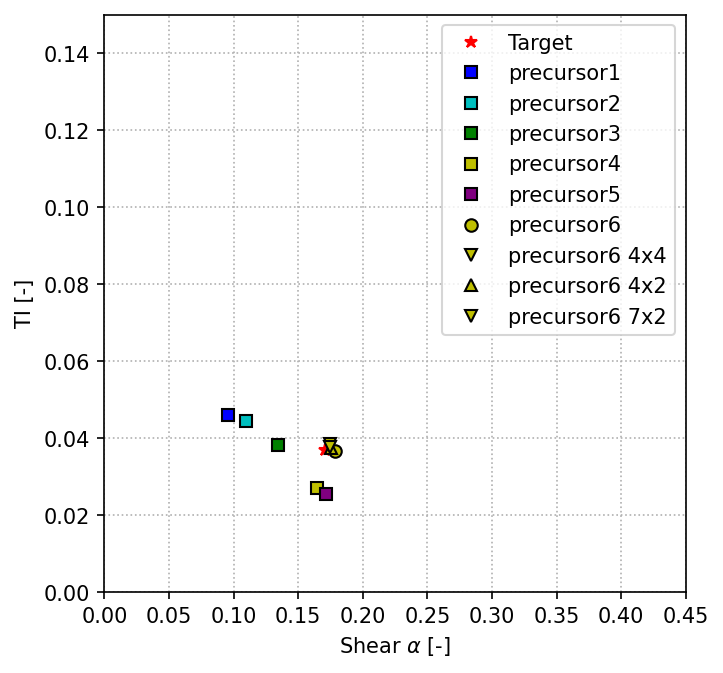

In [9]:
fig, ax = plt.subplots(figsize=(5,5), facecolor='w', dpi=150)

# Plot the ARM data
plt.plot(ARM_alpha, ARM_TI, 'r*', label='Target')

# Plot the AMR-Wind results
for case in caselist:
    mstyle=case['mstyle']
    #plt.plot(case['reportstats']['Alpha'][3], case['reportstats']['TI_horiz'][2], label=case['tag'], **mstyle)
    #plt.plot(case['alpha_30_169'], case['reportstats']['TI_horiz'][2], label=case['tag'], **mstyle)
    #plt.plot(case['alpha_60_91'], case['reportstats']['TI_horiz'][2], label=case['tag'], **mstyle)
    #plt.plot(case['alpha_30_270'], case['reportstats']['TI_horiz'][1], label=case['tag'], **mstyle)
    print(case['tag'], case['reportstats']['TI_horiz'][1])
    plt.plot(case['reportstats']['Alpha-Fit'][2], case['reportstats']['TI_horiz'][1],  label=case['tag'],**mstyle)

#plt.xlim([0.25, 0.45])
plt.xlim([0.0, 0.45])
plt.ylim([0, 0.15])
plt.xlabel(r'Shear $\alpha$ [-]')
plt.ylabel('TI [-]')
plt.grid(ls=':')
plt.legend()

## Plot velocity profile

Loading u
Loading v
Loading u
Loading v
Loading u
Loading v
Loading u
Loading v
Loading u
Loading v
Loading u
Loading v
Loading u
Loading v
Loading u
Loading v
Loading u
Loading v


Text(0.5, 1.0, 'Horizontal wind speed')

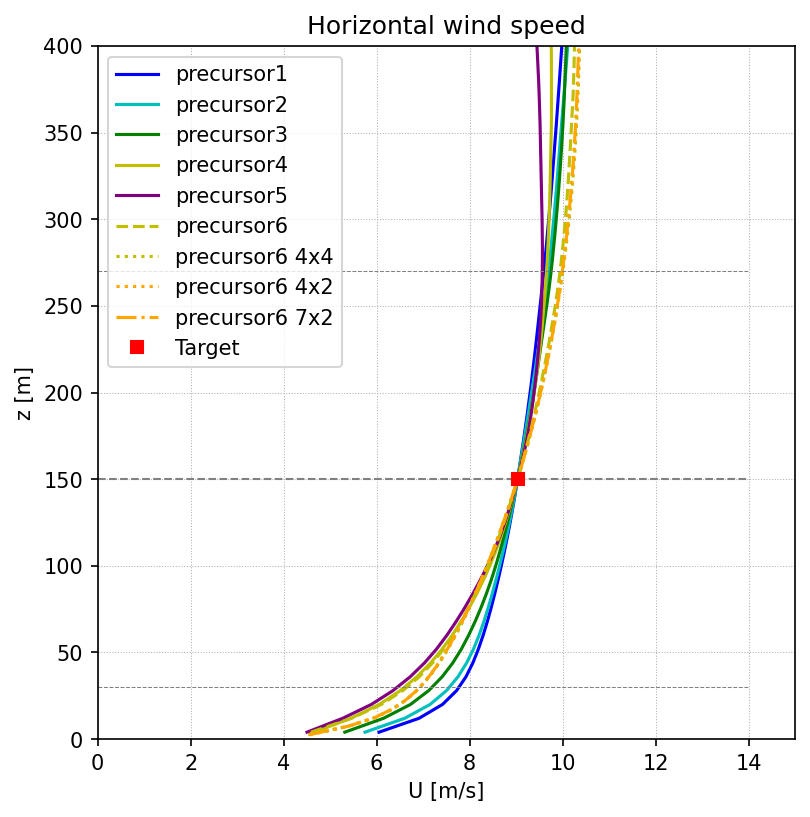

In [10]:
# Plot velocity
fig, ax = plt.subplots(figsize=(6,6), facecolor='w', dpi=150)


# This command returns the data, and then you can plot it individually
for case in caselist:
    amrdat = case['App'].ABLpostpro_plotprofiles(plotvars=['Uhoriz'], avgt=case['avgtimes'])
    lstyle=case['lstyle']
    plt.plot(amrdat['Uhoriz']['data'], amrdat['Uhoriz']['z'], label=case['tag'], **lstyle)

# Plot the turbine dimensions
plotrotorlines(ARM_zHH, rotorD, 0, 14, linestyles='dashed', color='gray',)

ax.plot(ARM_WS, ARM_zHH, 's', color='r', label='Target')
ax.legend()
ax.set_xlim([0, 15])
ax.set_xlabel('U [m/s]')
ax.grid(linestyle=':', linewidth=0.5)
ax.set_ylim([0,400])
ax.set_ylabel('z [m]')
ax.set_title('Horizontal wind speed')

# Compare AMR-Wind temperature profiles

Loading theta
Loading theta
Loading theta
Loading theta
Loading theta
Loading theta
Loading theta
Loading theta
Loading theta


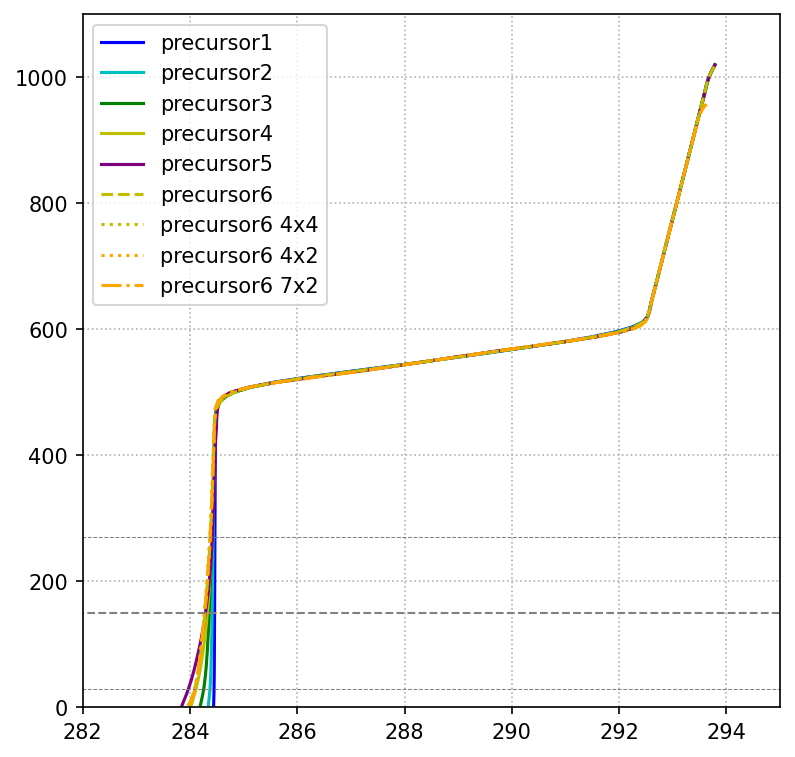

In [11]:
# Plot temperature
fig, ax = plt.subplots(figsize=(6,6), facecolor='w', dpi=150)

# This command returns the data, and then you can plot it individually
for case in caselist:
    amrdat = case['App'].ABLpostpro_plotprofiles(plotvars=['Temperature'], avgt=case['avgtimes'])
    lstyle=case['lstyle']
    plt.plot(amrdat['T']['data'], amrdat['T']['z'], label=case['tag'], **lstyle)

# Plot the turbine dimensions
plotrotorlines(ARM_zHH, rotorD, 280, 295, linestyles='dashed', color='gray',)

plt.ylim([0, 1100])
plt.xlim([282, 295])
plt.grid(ls=':')
ax.legend()

# Compare AMR-Wind veer profiles

Loading u
Loading v
Loading u
Loading v
Loading u
Loading v
Loading u
Loading v
Loading u
Loading v
Loading u
Loading v
Loading u
Loading v
Loading u
Loading v
Loading u
Loading v


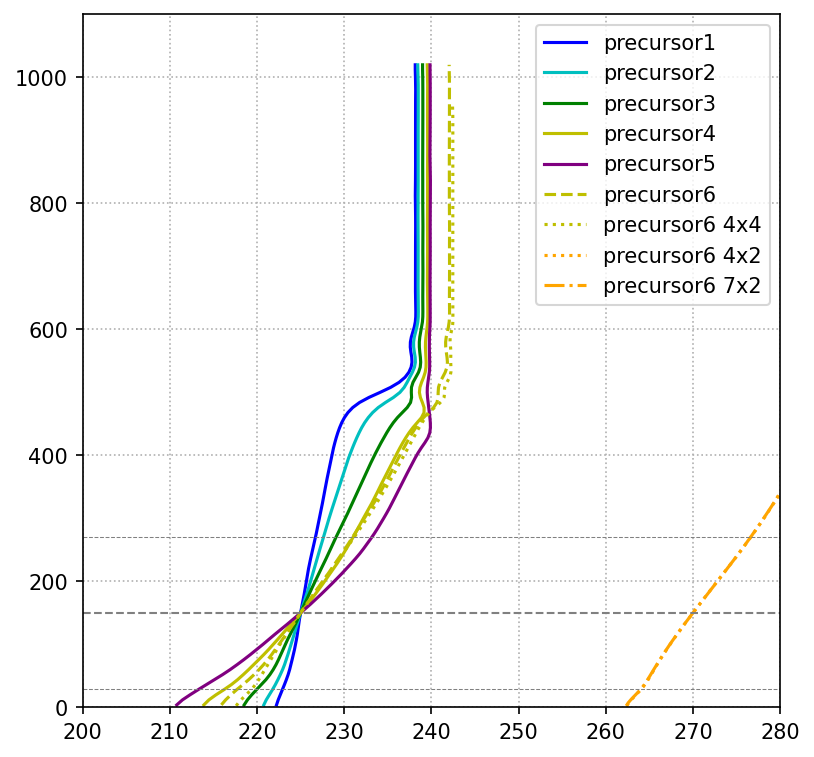

In [12]:
# Plot veer
fig, ax = plt.subplots(figsize=(6,6), facecolor='w', dpi=150)

# This command returns the data, and then you can plot it individually
for case in caselist:
    amrdat = case['App'].ABLpostpro_plotprofiles(plotvars=['WindDir'], avgt=case['avgtimes'])
    lstyle=case['lstyle']
    plt.plot(amrdat['WindDir']['data'], amrdat['WindDir']['z'], label=case['tag'], **lstyle)

# Plot the turbine dimensions
plotrotorlines(ARM_zHH, rotorD, 200, 300, linestyles='dashed', color='gray',)
plt.ylim([0, 1100]) #[0, 2000]
plt.xlim([200, 280]) #[170, 190]
plt.grid(ls=':')
ax.legend()

Loading u
Loading v
Loading u'u'_r
Loading v'v'_r
Loading u
Loading v
Loading u'u'_r
Loading v'v'_r
Loading u
Loading v
Loading u'u'_r
Loading v'v'_r
Loading u
Loading v
Loading u'u'_r
Loading v'v'_r
Loading u
Loading v
Loading u'u'_r
Loading v'v'_r
Loading u
Loading v
Loading u'u'_r
Loading v'v'_r
Loading u
Loading v
Loading u'u'_r
Loading v'v'_r
Loading u
Loading v
Loading u'u'_r
Loading v'v'_r
Loading u
Loading v
Loading u'u'_r
Loading v'v'_r


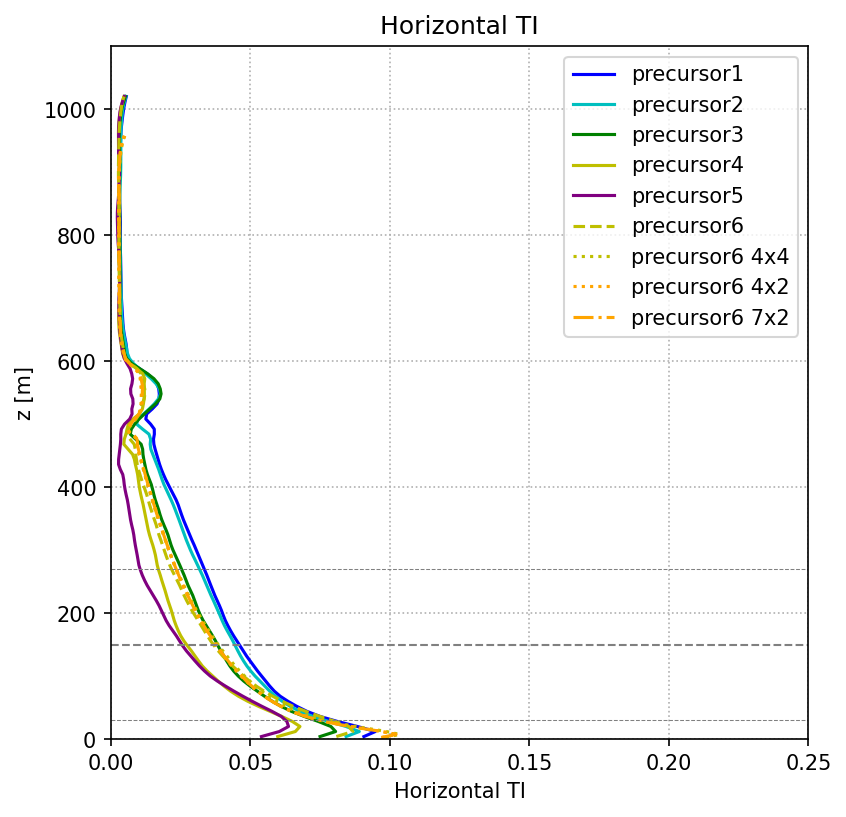

In [13]:
# Plot TI
fig, ax = plt.subplots(figsize=(6,6), facecolor='w', dpi=150)

# This command returns the data, and then you can plot it individually
for case in caselist:
    amrdat = case['App'].ABLpostpro_plotprofiles(plotvars=['TI_horiz'], avgt=case['avgtimes'])
    lstyle=case['lstyle']
    plt.plot(amrdat['TI_horiz']['data'], amrdat['TI_horiz']['z'], label=case['tag'], **lstyle)

# Plot the turbine dimensions
plotrotorlines(ARM_zHH, rotorD, 0, 1, linestyles='dashed', color='gray',)

plt.ylim([0, 1100])
plt.xlim([0, .25])
plt.grid(ls=':')
ax.set_ylabel('z [m]')
ax.set_xlabel('Horizontal TI')
ax.set_title('Horizontal TI')
ax.legend()